The notebook demonstrates how to solve a damping harmonic oscillator system. 
\begin{align}
\ddot{x} + 2 \zeta \omega_0 \dot{x} + \omega_0^2  x = f
\end{align}

where 
\begin{align} 
\omega_0 = \sqrt{k/m} \\
\zeta    = \mu / 2m 
\end{align}


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import integrate
import ipywidgets as ipw

The first method we try to solve the ODE system is finite difference.

In [2]:
# Finite difference.
# Central difference for the first derivative.
def fd(t, zeta, omega0, x0, xdot0, x_1):
    # t is discretized time series.
    # zeta, omega0 are constants in the equations.
    # x0 and x_1 are boundary conditions x[0] and x[-1].
    # xdot0 is {dx/dt}[0], initial condition.
    
    # x''= [x(n+1)-2x(n)+x(n-1)]/dt^2
    # x' = (x(n+1)-x(n-1))/dt/2
    # the ODE is discretized into
    # [x(n+1)-2x(n)+x(n-1)]/dt^2 + 2*zeta*omega0*(x(n+1)-x(n-1))/dt/2 + omega^2*x(n) = f(x(n)) + delta(dt^2)
    
    x    = np.zeros_like(t)
    x[0] = x0
    dt   = t[1] - t[0]
    x[1] = xdot0*dt*2 + x_1 
    # print(x[0], x[1])
    a1   = zeta*omega0*dt
    a2   = omega0**2*dt**2
    for i in range(2,len(t)):
        x[i] = (2.-a2)*x[i-1] + (a1-1.)*x[i-2]
        x[i] = x[i]/(1.+a1)
        # print(i,x[i],a1,a2,dt)
    return x
    

A second solution is to use scipy integrate to sovle the ODE. 


Referece: https://scientific-python.readthedocs.io/en/latest/notebooks_rst/3_Ordinary_Differential_Equations/02_Examples/Harmonic_Oscillator.html


In [3]:
def ode(X, t, zeta, omega0):
    """
    Free Harmonic Oscillator ODE
    """
    x, dotx = X
    ddotx = -2*zeta*omega0*dotx - omega0**2*x
    return [dotx, ddotx]

def update(X0, zeta = 0.05, omega0 = 2.*np.pi):
    """
    Update function.
    """
    #X0 = [1., 0.] x[0] and dotx[0]
    
    sol = integrate.odeint(ode, X0, t, args = (zeta, omega0))
    return sol[:, 0]


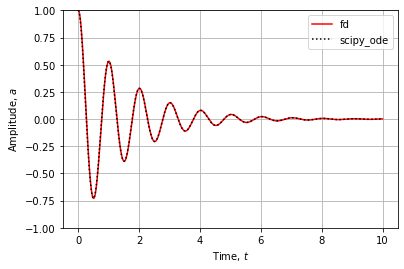

In [4]:
Nt     = 1000
t      = np.linspace(0., 10., Nt)

# initial and boundary conditions for the finite difference method.
x0     = 1.
x_1    = 1. # Assume x[-1] = x[0]
xdot0  = 0.

# 
X0     = [1., 0.] # x[0] and dotx[0]

# set constants for the system
omega0 = 2.*np.pi*1.
zeta   = 0.1

x1     = fd(t, zeta, omega0, x0, xdot0, x_1) # Method 1
x2     = update(X0, zeta, omega0) # Method 2
fig    = plt.figure()

plt.plot(t, x1, 'r',  label='fd')
plt.plot(t, x2, 'k:', label='scipy_ode')

plt.grid()
plt.ylim(-1., 1.)
plt.xlabel("Time, $t$")
plt.ylabel("Amplitude, $a$")
plt.legend()